# <center> Graduate Rotational Internship Program </center><p><center>The Sparks Foundation</center>

<b> <h2>Name : Soorya E T </h2></b>

## <center> Task 1 : Prediction using Supervised ML </center>

### <u>Objective</u>    :     <u> Linear Regression Model for Score Prediction</u>

### This model is used to predict the percentage of marks of a student based on the number of study hours.
###  This is a simple linear regression task as it involves  2 variables.

<h2> <u>Importing Libraries</u></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2><u> Reading Data </u></h2>

In [2]:
data = pd.read_csv("/home/surya/TSF INTERNSHIP/GRIP Task1- Linear_Regression/task1_student.csv")


In [3]:
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape

(25, 2)

In [5]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<h2><u> Checking for null values </u></h2>

In [7]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

<h2><u> Exploratory Data Analysis (EDA) </u></h2>

<h3>visualizing with scatter plot</h3>

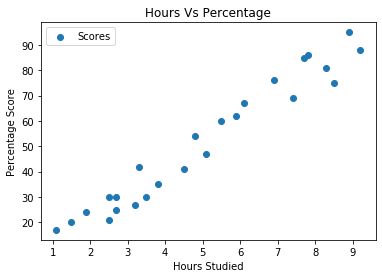

In [8]:
plt.scatter(x="Hours",y="Scores",label="Scores",data=data)  

plt.legend()
plt.title("Hours Vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

<h3> From the above graph , we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score </h3>

<h3>visualizing using histogram</h3>

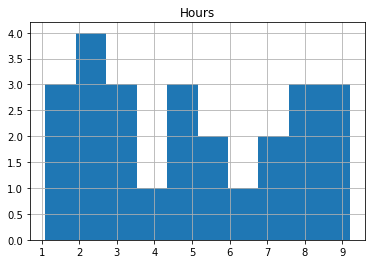

In [9]:
plt.hist(data["Hours"])

plt.title("Hours")
plt.grid()
plt.show()

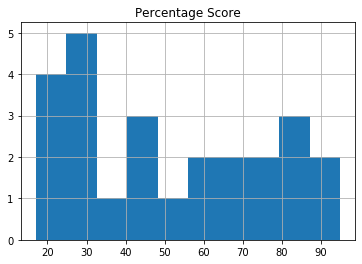

In [10]:
plt.hist(data["Scores"]) 

plt.title("Percentage Score")
plt.grid()
plt.show()


<h3> Checking for Outlier Values</h3>

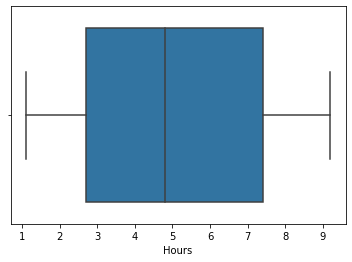

In [11]:
sns.boxplot(data["Hours"])


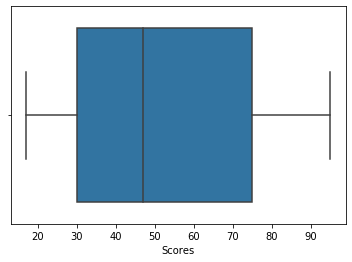

In [12]:
sns.boxplot(data["Scores"])

<h3> From above boxplot representation, it is clear that there are no outlier values in the data </h3>

<h3> Correlation </h3>

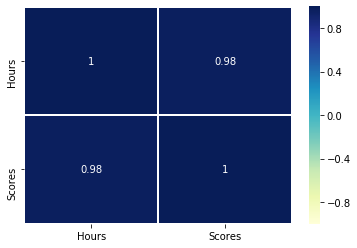

In [13]:
cor_mat= data.corr()          # correlation using heatmap representation 

sns.heatmap(cor_mat,vmax=1,vmin=-1,annot=True,linewidth=1.5,cmap="YlGnBu")


<h3> From above correlation matrix, it is clear that Hours and Scores are strongly correlated </h3>

<h3>visualizing using basic line plot</h3>

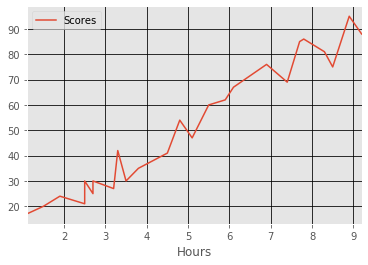

In [14]:
from matplotlib import style      
style.use("ggplot")

df = data.sort_values(["Hours","Scores"])   

df.plot(x="Hours",y="Scores")
plt.grid(True,color="black")
plt.show()

<h2><u> Preparing the data</u></h2>

<h3>Dividing the data into attributes (inputs) and labels (outputs)</h3>

In [15]:
X = data["Hours"]
y = data["Scores"]

In [16]:
X=X.values.reshape(-1, 1)
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [17]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

<h2><u>Splitting the data into training and test sets</u></h2>

<h3>Now we have our attributes and labels, hence, next step is to split the data into training and test sets.
    We will do this by using Scikit-Learn's built-in train_test_split() method</h3>

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<h2><u>Training the Algorithm</u></h2>

<h3>We have split our data into training and testing sets, and next step is to train our algorithm.</h3>


<h3>Using Linear Regression for modelling</h3>

In [19]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()   # creating object of LinearRegression

regressor.fit(X_train, y_train)  # training and fitting LR object using training data

print("Training complete")


Training complete


In [20]:
regressor.coef_          #coefficients of linear regression


array([9.91065648])

In [21]:
regressor.intercept_    #intercept of linear regression 


2.018160041434683

<h2><u>Making Predictions </u></h2>


<h3>Since we have trained our algorithm, now we have to do some predictions.</h3>

In [22]:
print(X_test)   # Testing data - In Hours

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [23]:
y_pred = regressor.predict(X_test)    # Predicting the scores for test data
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

<h2><u> Comparing Actual Vs Predicted </u></h2>

In [24]:
Results = pd.DataFrame(columns=["Hours", "Actual", "Predicted"])


Results["Actual"] = y_test
Results["Predicted"] = y_pred
Results["Hours"] = X_test

Results=Results.reset_index()
Results


,index,Hours,Actual,Predicted
0,5,1.5,20,16.884145
1,2,3.2,27,33.732261
2,19,7.4,69,75.357018
3,16,2.5,30,26.794801
4,11,5.9,62,60.491033


<h3>Visualizing Training Dataset Results</h3>

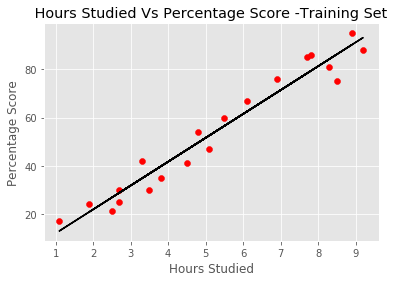

In [25]:
plt.scatter(X_train, y_train, color="red")

plt.plot(X_train, regressor.predict(X_train), color="black")

plt.title(" Hours Studied Vs Percentage Score -Training Set ")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

<h3>Visualising Testing Dataset Results</h3>

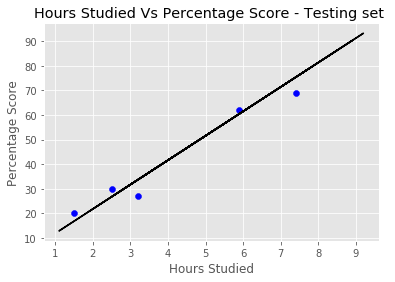

In [26]:
plt.scatter(X_test, y_test, color = "blue")

plt.plot(X_train, regressor.predict(X_train), color="black")

plt.title("Hours Studied Vs Percentage Score - Testing set ")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

<h3> You can also test for your own data</h3>

<b>What will be the predicted score if a student studies for 9.25 hrs/ day?</b>

In [27]:
hours = 9.25

prediction = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


<h2><u>Evaluating The Model</u></h2>

<h3>The metrics here we use to evaluate regression model are :<p>
    
    Mean Absolute Error,
    Mean Square Error,
    Root Mean Square Error
</h3>
    

In [28]:
from sklearn import metrics

import math

print("Mean Absolute Error : ",metrics.mean_absolute_error(y_pred,y_test))


Mean Absolute Error :  4.183859899002975


In [29]:
print("Mean Square Error : ",metrics.mean_squared_error(y_pred,y_test))    # Testing Error

print()

print("Root Mean Square Error : ",math.sqrt(metrics.mean_squared_error(y_pred,y_test)))

Mean Square Error :  21.5987693072174

Root Mean Square Error :  4.6474476121003665


<h3>Calculating Training Error</h3>

In [30]:
y_pred_training = regressor.predict(X_train)

print("Root Mean Square Error : ",math.sqrt(metrics.mean_squared_error(y_pred_training,y_train)))

Root Mean Square Error :  5.558613350226342


<h2><u> Checking R^2 (coefficient of determination) regression score function </u></h2>


<h3>R squared is a statistical measure of how close the data are to the fitted regression line.</h3>
 <h3>It is also known as coefficient of determination or coefficient of multiple determination for multiple regression.</h3>
 <h3>Best possible score is 1.0</h3>

In [31]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)


0.9454906892105356

<h3> <center>Thank you</center> 